In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from common import NGSpiceRaw, FIG_WIDTH, figure_setup, figure_save

%matplotlib widget

figure_setup()

In [4]:
data = NGSpiceRaw('../xschem/simulation/adc_tb.raw', live=False)

Loaded 1 plots from ../xschem/simulation/adc_tb.raw


In [5]:
data.names

('time',
 'v(clk_comp)',
 'v(clk_digital)',
 'v(clk_sample)',
 'v(clock)',
 'v(clock_comp)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#bd)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#bi)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#bp)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#bs)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#di)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#gp)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#int1)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#int2)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#int3)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#int4)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#int5)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#int6)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#int7)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#int8)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#int9)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#noi)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#si)',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#flow(noii))',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#flow(res1))',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#flow(res2))',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#flow(res3))',
 'v(n.x1.x1.x1.xx0.nsg13_lv_pmos#flow

In [6]:
# Nodes with 'x1.x2' pattern
x1_x2_nodes = [name for name in data.names if 'x1.x2' in name]

x1_x2_nodes

['v(n.x1.x1.x2.xn0.nsg13_lv_nmos#bd)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#bi)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#bp)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#bs)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#di)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#gp)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#int1)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#int2)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#int3)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#int4)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#int5)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#int6)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#int7)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#int8)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#int9)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#noi)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#si)',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#flow(noii))',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#flow(res1))',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#flow(res2))',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#flow(res3))',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#flow(res4))',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#flow(res5))',
 'v(n.x1.x1.x2.xn0.nsg13_lv_nmos#flo

In [15]:
times = data['time']
comp_n = data['v(x1.x2.n)']
comp_p = data['v(x1.x2.p)']
comp_s = data['v(x1.x2.s)']
comp_1 = data['v(x1.comp_1)']
comp_2 = data['v(x1.comp_2)']

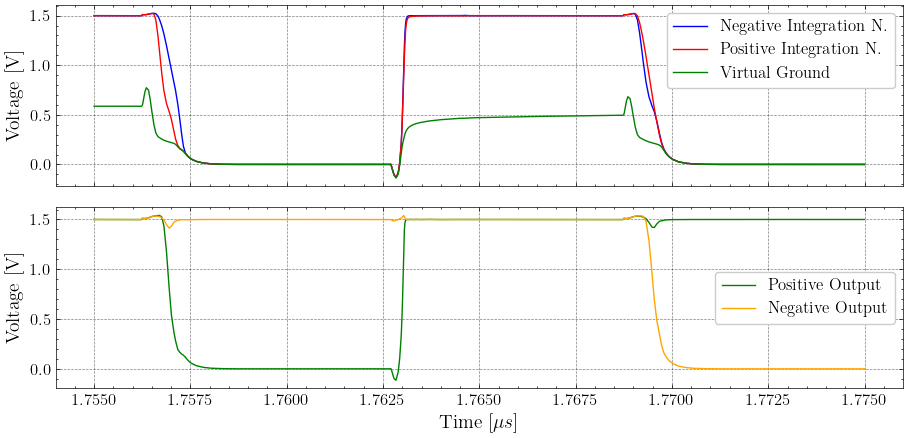

In [27]:
t_min = 1.755e-6
t_max = 1.775e-6

interval = (times >= t_min) & (times <= t_max)

times_int = times[interval]
comp_n_int = comp_n[interval]
comp_p_int = comp_p[interval]
comp_s_int = comp_s[interval]
comp_1_int = comp_1[interval]
comp_2_int = comp_2[interval]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(FIG_WIDTH, FIG_WIDTH * 0.5), sharex=True)
ax1.plot(times_int * 1e6, comp_n_int, label='Negative Integration N.', color='blue')
ax1.plot(times_int * 1e6, comp_p_int, label='Positive Integration N.', color='red')
ax1.plot(times_int * 1e6, comp_s_int, label='Virtual Ground', color='green')
ax1.legend()
ax1.set_ylabel('Voltage [V]')
ax2.plot(times_int * 1e6, comp_1_int, label='Positive Output', color='green')
ax2.plot(times_int * 1e6, comp_2_int, label='Negative Output', color='orange')
ax2.legend()
ax2.set_xlabel('Time [$\\mu s$]')
ax2.set_ylabel('Voltage [V]')
plt.tight_layout()
plt.show()

figure_save(fig, 'comp_alternative')

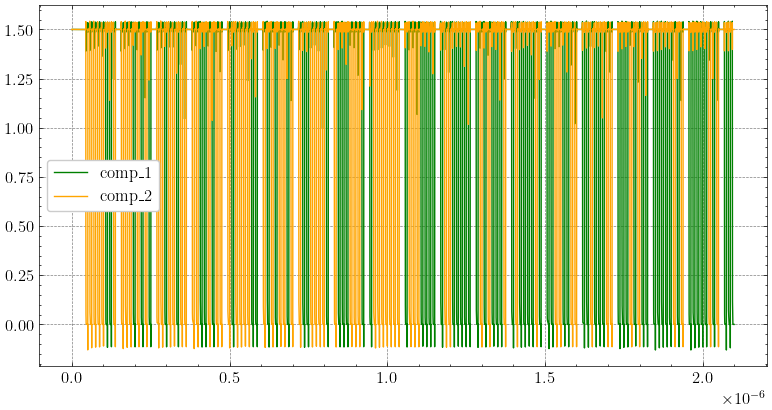

In [11]:
plt.figure(figsize=(FIG_WIDTH, FIG_WIDTH * 0.5))
plt.plot(times, comp_1, label='comp_1', color='green')
plt.plot(times, comp_2, label='comp_2', color='orange')
plt.legend()
plt.show()